In [8]:
'''
corso di intelligenza artificiale 

'''

'\ncorso di intelligenza artificiale \n\n'

In [4]:
import pandas as pd

# Lista di categorie
frutta = ["Mela", "Banana", "Arancia", "Mela"]

# Crea DataFrame
df = pd.DataFrame({"frutta": frutta})

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=["frutta"])

print(df_encoded)


   frutta_Arancia  frutta_Banana  frutta_Mela
0           False          False         True
1           False           True        False
2            True          False        False
3           False          False         True


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Lista di categorie
frutta = [["Mela"], ["Banana"], ["Arancia"], ["Mela"]]

# Crea encoder (versione aggiornata)
encoder = OneHotEncoder(sparse_output=False)

# Applica one-hot
encoded = encoder.fit_transform(frutta)

print(encoded)
print(encoded)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Input one-hot:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Output one-hot:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


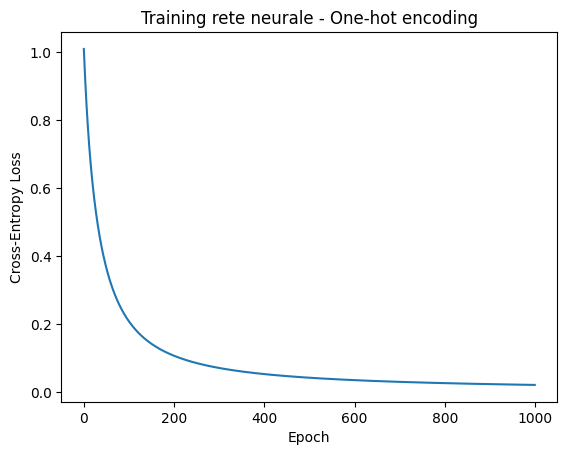

Predizione per 'Mela': Mela
Predizione per 'Banana': Banana
Predizione per 'Arancia': Arancia


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# ======== 1. Dataset =========
frutta = [["Mela"], ["Banana"], ["Arancia"], ["Mela"], ["Banana"], ["Arancia"]]
target = [["Mela"], ["Banana"], ["Arancia"], ["Mela"], ["Banana"], ["Arancia"]]

# One-hot encoding input e output
encoder_input = OneHotEncoder(sparse_output=False)
X = encoder_input.fit_transform(frutta)

encoder_output = OneHotEncoder(sparse_output=False)
Y = encoder_output.fit_transform(target)

print("Input one-hot:\n", X)
print("Output one-hot:\n", Y)

# ======== 2. Rete neurale semplice =========
np.random.seed(0)

input_size = X.shape[1]   # 3
output_size = Y.shape[1]  # 3
lr = 0.1                  # learning rate

# Pesi iniziali casuali
W = np.random.randn(input_size, output_size)
b = np.zeros((1, output_size))

# Funzione softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Funzione loss (cross-entropy)
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# ======== 3. Training =========
losses = []

for epoch in range(1000):
    # Forward pass
    Z = np.dot(X, W) + b
    Y_pred = softmax(Z)
    
    # Loss
    loss = cross_entropy(Y, Y_pred)
    losses.append(loss)
    
    # Backprop (gradiente semplice)
    dZ = Y_pred - Y
    dW = np.dot(X.T, dZ) / X.shape[0]
    db = np.sum(dZ, axis=0, keepdims=True) / X.shape[0]
    
    # Aggiorna pesi
    W -= lr * dW
    b -= lr * db

# ======== 4. Visualizza curva dell'errore =========
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training rete neurale - One-hot encoding")
plt.show()

# ======== 5. Test =========
def predict(fruit_name):
    x = encoder_input.transform([[fruit_name]])
    y_pred = softmax(np.dot(x, W) + b)
    pred_label = encoder_output.inverse_transform(y_pred)
    return pred_label[0][0]

print("Predizione per 'Mela':", predict("Mela"))
print("Predizione per 'Banana':", predict("Banana"))
print("Predizione per 'Arancia':", predict("Arancia"))
